# 0. Handle packages and stuff for work

### IMPORTANT !!!

install opencv-python matplotlib imageio gdown tensorflow
BUT make sure you have EXACTLY THE SAME VERSION as I have. As well as Numpy, Matplotlib and Pillow

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
appnope                      0.1.3
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
beautifulsoup4               4.12.2
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.3.0
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    2.0.0
filelock                     3.12.4
flatbuffers                  23.5.26
fonttools                    4.43.1
gast                         0.4.0
gdown                        4.7.1
google-auth                  2.23.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.59.0
h5py                         3.10.0
idna                         3.4
imageio                      2.23.0
importlib-metadata           6.8.0
importlib-resources          6.1.0
ipykernel                    6.25.2
ipython                      8.16.1
jedi                         0.19.1
jupyter_client               8.4.0
jupyter_core                 5.4.0
keras                        2.10.0
Keras-Preprocessing          1.1.2
kiwisolver                   1.4.5
libclang                     16.0.6
Markdown                     3.5
MarkupSafe                   2.1.3
matplotlib                   3.6.2
matplotlib-inline            0.1.6
ml-dtypes                    0.2.0
nest-asyncio                 1.5.8
numpy                        1.26.1
oauthlib                     3.2.2
opencv-python                4.6.0.66
opt-einsum                   3.3.0
packaging                    23.2
parso                        0.8.3
pexpect                      4.8.0
pickleshare                  0.7.5
Pillow                       9.3.0
pip                          23.3
platformdirs                 3.11.0
prompt-toolkit               3.0.39
protobuf                     3.19.6
psutil                       5.9.6
ptyprocess                   0.7.0
pure-eval                    0.2.2
pyasn1                       0.5.0
pyasn1-modules               0.3.0
Pygments                     2.16.1
pyparsing                    3.1.1
PySocks                      1.7.1
python-dateutil              2.8.2
pyzmq                        25.1.1
requests                     2.31.0
requests-oauthlib            1.3.1
rsa                          4.9
setuptools                   56.0.0
six                          1.16.0
soupsieve                    2.5
stack-data                   0.6.3
tensorboard                  2.10.1
tensorboard-data-server      0.6.1
tensorboard-plugin-wit       1.8.1
tensorflow                   2.10.1
tensorflow-estimator         2.10.0
tensorflow-io-gcs-filesystem 0.34.0
termcolor                    2.3.0
tornado                      6.3.3
tqdm                         4.66.1
traitlets                    5.11.2
typing_extensions            4.8.0
urllib3                      2.0.7
wcwidth                      0.2.8
Werkzeug                     3.0.0
wheel                        0.41.2
wrapt                        1.14.1
zipp                         3.17.0

In [1]:
pip list

Package                      Version
---------------------------- ---------
absl-py                      2.0.0
appnope                      0.1.3
asttokens                    2.4.0
astunparse                   1.6.3
backcall                     0.2.0
beautifulsoup4               4.12.2
cachetools                   5.3.1
certifi                      2023.7.22
charset-normalizer           3.3.0
comm                         0.1.4
contourpy                    1.1.1
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.1.3
executing                    2.0.0
filelock                     3.12.4
flatbuffers                  23.5.26
fonttools                    4.43.1
gast                         0.4.0
gdown                        4.7.1
google-auth                  2.23.3
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.59.0
h5py                         3.10.0
i

In [2]:
import os
import cv2
import tensorflow as tf
import numpy as np
from typing import List
from matplotlib import pyplot as plt
import imageio

2023-10-24 21:06:39.775661: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
tf.config.list_physical_devices('GPU')

[]

In [4]:
pysical_devices = tf.config.list_physical_devices('GPU')
try:
    tf.config.experimental.set_memory_growth(pysical_devices[0], True)
except:
    pass

# 1. Buil Data Loading Functions

In [5]:
import gdown

In [6]:
# url = "https://drive.google.com/uc?id=1YlvpDLix3S-U8fd-gqRwPcWXAXm8JwjL"
# output = "data.zip"
# gdown.download(url, output, quiet=False)
# gdown.extractall("data.zip")

In [7]:
def load_video(path:str) -> List[float]:
    """
    This function opens a video, reads its frames, applies image processing,
    and performs statistical normalization before returning the processed frames
    """

    cap = cv2.VideoCapture(path)
    frames = []
    # This loop iterates through all frames in the video.
    # The number of frames is determined using cap.get(cv2.CAP_PROP_FRAME_COUNT), and then the loop is executed accordingly
    for _ in range(int(cap.get(cv2.CAP_PROP_FRAME_COUNT))):
        ret, frame = cap.read()
        # The frame is converted to grayscale to remove color information and reduce the data volume
        frame = tf.image.rgb_to_grayscale(frame)
        frames.append(frame[190:236,80:220,:])
    cap.release()

    mean = tf.math.reduce_mean(frames)
    std = tf.math.reduce_std(tf.cast(frames, tf.float32))

    return tf.cast((frames - mean), tf.float32) / std

In [8]:
vocab = [x for x in "abcdefghijklmnopqrstuvwxyz'?!123456789 "]

In [9]:
vocab

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 "'",
 '?',
 '!',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ' ']

In [10]:
char_to_num = tf.keras.layers.StringLookup(vocabulary=vocab, oov_token="")
num_to_char = tf.keras.layers.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), oov_token="", invert=True
)

print(
    f"The vocabulary is: {char_to_num.get_vocabulary()}"
    f"(size = {char_to_num.vocabulary_size()})"
)

The vocabulary is: ['', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', "'", '?', '!', '1', '2', '3', '4', '5', '6', '7', '8', '9', ' '](size = 40)


2023-10-24 21:06:56.481502: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
char_to_num(['t', 'o', 'b', 'i', 'a', 's'])

<tf.Tensor: shape=(6,), dtype=int64, numpy=array([20, 15,  2,  9,  1, 19])>

In [12]:
num_to_char([20, 15, 2, 9, 1, 19])

<tf.Tensor: shape=(6,), dtype=string, numpy=array([b't', b'o', b'b', b'i', b'a', b's'], dtype=object)>

In [13]:
def load_alignments(path:str) -> List[str]: 
    with open(path, 'r') as f: 
        lines = f.readlines() 
    tokens = []
    for line in lines:
        line = line.split()
        if line[2] != 'sil': 
            tokens = [*tokens,' ',line[2]]
    return char_to_num(tf.reshape(tf.strings.unicode_split(tokens, input_encoding='UTF-8'), (-1)))[1:]

In [14]:
def load_data(path: str): 
    path = bytes.decode(path.numpy())
    file_name = path.split('/')[-1].split('.')[0]
    # File name splitting for windows
    # file_name = path.split('\\')[-1].split('.')[0]
    video_path = os.path.join('data','s1',f'{file_name}.mpg')
    alignment_path = os.path.join('data','alignments','s1',f'{file_name}.align')
    frames = load_video(video_path) 
    alignments = load_alignments(alignment_path)
    
    return frames, alignments

In [15]:
test_path = '../ML_LipReading/data/s1/bbal6n.mpg'

In [16]:
frames, alignments = load_data(tf.convert_to_tensor(test_path))

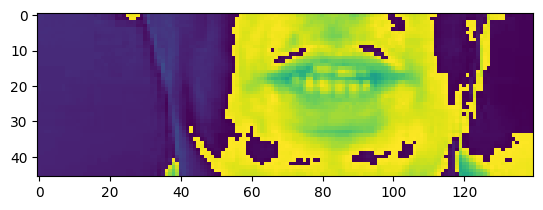

In [17]:
plt.imshow(frames[40])

In [18]:
alignments

<tf.Tensor: shape=(21,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  1, 20, 39, 12, 39, 19,  9, 24,
       39, 14, 15, 23])>

In [19]:
num_to_char(alignments)

<tf.Tensor: shape=(21,), dtype=string, numpy=
array([b'b', b'i', b'n', b' ', b'b', b'l', b'u', b'e', b' ', b'a', b't',
       b' ', b'l', b' ', b's', b'i', b'x', b' ', b'n', b'o', b'w'],
      dtype=object)>

In [20]:
tf.strings.reduce_join([bytes.decode(x) for x in num_to_char(alignments.numpy()).numpy()])

<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue at l six now'>

In [21]:
def mappable_function(path:str) -> List[str]:
    """
    This function takes a path path as an input parameter and uses tf.py_function
    to call the load_data function with this path. It is expected that load_data
    loads data and returns it in a specific format, specifically as a float tensor and
    an integer tensor (tf.float32, tf.int64), which ultimately corresponds
    to the output/return of the load_data function
    """
    result = tf.py_function(load_data, [path], (tf.float32, tf.int64))
    return result

# 2. Create Data Pipeline

### 2.1 Look for all the mpg Files, shuffles it and store it into data variable

In [22]:
data = tf.data.Dataset.list_files('../ML_LipReading/data/s1/*.mpg')
data = data.shuffle(500, reshuffle_each_iteration=False)

In [23]:
# this is how it looks like now
data.as_numpy_iterator().next()

b'../ML_LipReading/data/s1/lrwfzn.mpg'

### 2.2 Processing Each Element in Data
The line `data = data.map(mappable_function)` uses TensorFlow Datasets (tf.data.Dataset) and the `.map()` method to apply the `mappable_function` to each element in the dataset `data`. The dataset `data` likely contains paths to data that need to be loaded and converted into the format expected by `mappable_function`.

With this line, data processing is carried out within the dataset, where `mappable_function` is called for each element in the dataset. `mappable_function` converts the paths into the desired format, and the updated dataset is stored in `data`.

In [24]:
data = data.map(mappable_function)

In [25]:
# Here again: (tf.float32, tf.int64), the first one for frames and the second one for alignments
frames, alignments = data.as_numpy_iterator().next()

In [26]:
frames

array([[[[1.5166845 ],
         [1.5166845 ],
         [1.4787674 ],
         ...,
         [0.37917113],
         [0.37917113],
         [0.37917113]],

        [[1.4029332 ],
         [1.4787674 ],
         [1.4029332 ],
         ...,
         [0.37917113],
         [0.37917113],
         [0.37917113]],

        [[1.5546017 ],
         [1.5546017 ],
         [1.5546017 ],
         ...,
         [0.34125403],
         [0.30333692],
         [0.30333692]],

        ...,

        [[1.1375134 ],
         [1.0616791 ],
         [1.0616791 ],
         ...,
         [0.07583423],
         [0.07583423],
         [0.07583423]],

        [[1.0616791 ],
         [1.0616791 ],
         [1.0616791 ],
         ...,
         [0.03791711],
         [0.03791711],
         [0.03791711]],

        [[1.0616791 ],
         [1.0616791 ],
         [1.0616791 ],
         ...,
         [0.03791711],
         [0.03791711],
         [0.        ]]],


       [[[1.4408503 ],
         [1.4787674 ],
         [1.44

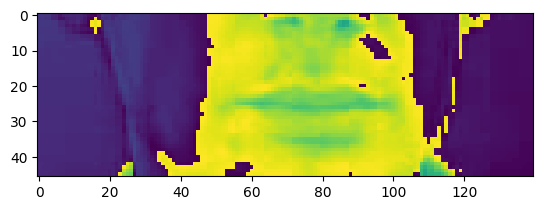

In [27]:
plt.imshow(frames[0])

In [28]:
alignments

array([19,  5, 20, 39,  7, 18,  5,  5, 14, 39,  2, 25, 39,  3, 39, 19,  5,
       22,  5, 14, 39, 19, 15, 15, 14])

### 2.3 Padding and Batching
Batches of 2 (2 videos and 2 alignments), make shure 75 Frames for each Video (rest NONE and don't care). The 40 is to ensure we have 40 Tokens for each alignment. If not padded out to 0

In [29]:
data = data.padded_batch(2, padded_shapes=([75, None, None, None], [40]))

### 2.4 Prefetch
Preloading as our ML Model is still loading 

In [30]:
data = data.prefetch(tf.data.AUTOTUNE)

In [31]:
train = data.take(450)
test = data.skip(450)

In [32]:
frames, alignments = data.as_numpy_iterator().next()

Now we have 2 videos and as well 2 alignments which are padded out with zeros to 40 --> !! FOR EACH BATCH !!

In [33]:
len(frames), alignments

(2,
 array([[12,  1, 25, 39, 23,  8,  9, 20,  5, 39,  9, 14, 39, 11, 39, 14,
          9, 14,  5, 39, 19, 15, 15, 14,  0,  0,  0,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0],
        [16, 12,  1,  3,  5, 39,  7, 18,  5,  5, 14, 39, 23,  9, 20,  8,
         39, 18, 39,  6, 15, 21, 18, 39, 14, 15, 23,  0,  0,  0,  0,  0,
          0,  0,  0,  0,  0,  0,  0,  0]]))

In [34]:
sample = data.as_numpy_iterator()

In [35]:
val = sample.next(); val[0]

array([[[[[1.3683294 ],
          [1.3683294 ],
          [1.3683294 ],
          ...,
          [9.282451  ],
          [0.14792751],
          [0.14792751]],

         [[1.3683294 ],
          [1.3683294 ],
          [1.3683294 ],
          ...,
          [9.282451  ],
          [0.        ],
          [0.        ]],

         [[1.2943656 ],
          [1.2943656 ],
          [1.2943656 ],
          ...,
          [0.11094563],
          [0.22189125],
          [0.22189125]],

         ...,

         [[0.9615288 ],
          [0.9615288 ],
          [0.9615288 ],
          ...,
          [0.        ],
          [9.430379  ],
          [9.430379  ]],

         [[0.9615288 ],
          [0.9615288 ],
          [0.9615288 ],
          ...,
          [0.        ],
          [9.430379  ],
          [9.430379  ]],

         [[0.9615288 ],
          [0.9615288 ],
          [0.9615288 ],
          ...,
          [0.        ],
          [9.430379  ],
          [9.430379  ]]],


        [[[1.4422

In [36]:
print(val[0][0])

[[[[1.3683294 ]
   [1.3683294 ]
   [1.3683294 ]
   ...
   [9.282451  ]
   [0.14792751]
   [0.14792751]]

  [[1.3683294 ]
   [1.3683294 ]
   [1.3683294 ]
   ...
   [9.282451  ]
   [0.        ]
   [0.        ]]

  [[1.2943656 ]
   [1.2943656 ]
   [1.2943656 ]
   ...
   [0.11094563]
   [0.22189125]
   [0.22189125]]

  ...

  [[0.9615288 ]
   [0.9615288 ]
   [0.9615288 ]
   ...
   [0.        ]
   [9.430379  ]
   [9.430379  ]]

  [[0.9615288 ]
   [0.9615288 ]
   [0.9615288 ]
   ...
   [0.        ]
   [9.430379  ]
   [9.430379  ]]

  [[0.9615288 ]
   [0.9615288 ]
   [0.9615288 ]
   ...
   [0.        ]
   [9.430379  ]
   [9.430379  ]]]


 [[[1.4422932 ]
   [1.4422932 ]
   [1.4053113 ]
   ...
   [9.356415  ]
   [0.25887313]
   [0.29585502]]

  [[1.4422932 ]
   [1.4422932 ]
   [1.4053113 ]
   ...
   [9.319433  ]
   [0.29585502]
   [0.07396375]]

  [[1.3313476 ]
   [1.3313476 ]
   [1.3313476 ]
   ...
   [0.18490939]
   [0.25887313]
   [0.25887313]]

  ...

  [[0.99851066]
   [0.99851066]
   [0.9

In [37]:
imageio.mimsave('../ML_LipReading/animation.gif', val[0][0], fps=10)

Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0.0, 9.430378913879395]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. R

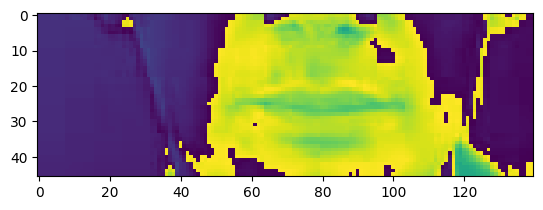

In [38]:
# 0: videos, 0: 1st video of the batch, 0: return first frame in the video
plt.imshow(val[0][0][0])

In [39]:
# show the text to the gif we made above [0][0]
# here we use [1][0] to enter not the video - [1] enters the text
tf.strings.reduce_join([num_to_char(word) for word in val[1][0]])

<tf.Tensor: shape=(), dtype=string, numpy=b'lay white at r seven soon'>

# 3. Design the Deep Neural Network

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv3D, LSTM, Dense, Dropout, Bidirectional, MaxPool3D, Activation, Reshape, SpatialDropout3D, BatchNormalization, TimeDistributed, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler

In [41]:
data.as_numpy_iterator().next()[0][0].shape

(75, 46, 140, 1)

In [42]:
model = Sequential()
model.add(Conv3D(128, 3, input_shape=(75, 46, 140, 1), padding="same", activation="relu"))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(256, 3, padding='same', activation='relu'))
model.add(MaxPool3D((1,2,2)))

model.add(Conv3D(75, 3, padding='same', activation='relu'))
model.add(MaxPool3D((1,2,2)))

model.add(TimeDistributed(Flatten()))

model.add(Bidirectional(LSTM(128, kernel_initializer="Orthogonal", return_sequences=True)))
model.add(Dropout(.5))

model.add(Bidirectional(LSTM(128, kernel_initializer="Orthogonal", return_sequences=True)))
model.add(Dropout(.5))

model.add(Dense(char_to_num.vocabulary_size()+1, kernel_initializer="he_normal", activation='softmax'))

1. **Conv3D Layers (Convolutional Layers)**:
   - These layers are used to detect patterns in the 3D video recordings of lip movements. The 3D information can represent the spatial changes in lip movements.

2. **Activation Function (ReLU)**:
   - ReLU is applied after each convolutional layer to capture non-linear patterns in the data, helping control the activation of neurons.

3. **Max-Pooling**:
   - Max-pooling reduces the spatial dimension of the data and focuses on the most important features. In this case, it is used to speed up processing and remove unimportant details.

4. **TimeDistributed(Flatten())**:
   - This step converts the 3D data into a flat form, preparing it for use in the LSTM layers.

5. **Bidirectional LSTM Layers**:
   - Since lip reading exhibits temporal dependency (the order of lip movements is important), bidirectional LSTM layers are used to capture these temporal patterns. They can analyze lip movements both forward and backward.

6. **Dropout**:
   - Dropout helps make the model more robust and prevents overfitting. In this case, it is important because the model is trained on a variety of lip movements, and the risk of overfitting is high.

7. **Dense Layer**:
   - The output layer of the model returns a probability distribution over possible characters (letters or words) corresponding to the lip movements. The model can then predict the most likely text based on the lip movements.

In summary, this model is used to analyze lip movements in video files and convert them into text by focusing on the temporal patterns in lip movements. This can be useful in applications such as automatic recognition of spoken text from lip movements in videos.

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv3d (Conv3D)             (None, 75, 46, 140, 128)  3584      
                                                                 
 max_pooling3d (MaxPooling3D  (None, 75, 23, 70, 128)  0         
 )                                                               
                                                                 
 conv3d_1 (Conv3D)           (None, 75, 23, 70, 256)   884992    
                                                                 
 max_pooling3d_1 (MaxPooling  (None, 75, 11, 35, 256)  0         
 3D)                                                             
                                                                 
 conv3d_2 (Conv3D)           (None, 75, 11, 35, 75)    518475    
                                                                 
 max_pooling3d_2 (MaxPooling  (None, 75, 5, 17, 75)    0

# 4. Setup Training

In [44]:
def scheduler(epoch, lr):
    if epoch < 30:
        return lr
    else:
        return lr * tf.math.exp(-0.1)

In [45]:
def CTCLoss(y_true, y_pred):
    batch_len = tf.cast(tf.shape(y_true)[0], dtype="int64")
    input_length = tf.cast(tf.shape(y_pred)[1], dtype="int64")
    label_length = tf.cast(tf.shape(y_true)[1], dtype="int64")

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype="int64")
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype="int64")

    loss = tf.keras.backend.ctc_batch_cost(y_true, y_pred, input_length, label_length)
    return loss

In [46]:
class ProduceExample(tf.keras.callbacks.Callback): 
    def __init__(self, dataset) -> None: 
        self.dataset = dataset.as_numpy_iterator()
    
    def on_epoch_end(self, epoch, logs=None) -> None:
        data = self.dataset.next()
        yhat = self.model.predict(data[0])
        decoded = tf.keras.backend.ctc_decode(yhat, [75,75], greedy=False)[0][0].numpy()
        for x in range(len(yhat)):           
            print('Original:', tf.strings.reduce_join(num_to_char(data[1][x])).numpy().decode('utf-8'))
            print('Prediction:', tf.strings.reduce_join(num_to_char(decoded[x])).numpy().decode('utf-8'))
            print('~'*100)

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss=CTCLoss)

In [48]:
checkpoint_callback = ModelCheckpoint(os.path.join('models','checkpoint'), monitor='loss', save_weights_only=True)

In [49]:
schedule_callback = LearningRateScheduler(scheduler)

In [50]:
example_callback = ProduceExample(data)

In [51]:
# model.fit(train,
#          validation_data=test,
#          epochs=100,
#          callbacks=[checkpoint_callback, schedule_callback, example_callback])

# 5. Make a Prediction

In [52]:
# url = 'https://drive.google.com/uc?id=1vWscXs4Vt0a_1IH1-ct2TCgXAZT-N3_Y'
# output = 'checkpoints.zip'
# gdown.download(url, output, quiet=False)
# gdown.extractall('checkpoints.zip', 'models')

In [53]:
model.load_weights('models/checkpoint')

In [54]:
test_data = test.as_numpy_iterator()

In [55]:
sample = test_data.next()

In [56]:
yhat = model.predict(sample[0])

1/1 [==============================] - 11s 11s/step


In [57]:
print('~'*70, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in sample[1]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with h three soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place green at y one soon'>]

In [58]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75,75], greedy=True)[0][0].numpy()

In [59]:
print('~'*70, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin white with h three soon'>,
 <tf.Tensor: shape=(), dtype=string, numpy=b'place green at y one soon'>]

# Test on a Video

In [60]:
sample = load_data(tf.convert_to_tensor('data/s1/bbbs7a.mpg'))

In [63]:
sample[1]

<tf.Tensor: shape=(25,), dtype=int64, numpy=
array([ 2,  9, 14, 39,  2, 12, 21,  5, 39,  2, 25, 39, 19, 39, 19,  5, 22,
        5, 14, 39,  1,  7,  1,  9, 14])>

In [61]:
print('~'*70, 'REAL TEXT')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in [sample[1]]]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ REAL TEXT


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue by s seven again'>]

In [64]:
yhat = model.predict(tf.expand_dims(sample[0], axis=0))

1/1 [==============================] - 7s 7s/step


In [66]:
yhat.shape

(1, 75, 41)

In [67]:
decoded = tf.keras.backend.ctc_decode(yhat, input_length=[75], greedy=True)[0][0].numpy()

In [68]:
print('~'*70, 'PREDICTIONS')
[tf.strings.reduce_join([num_to_char(word) for word in sentence]) for sentence in decoded]

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~ PREDICTIONS


[<tf.Tensor: shape=(), dtype=string, numpy=b'bin blue by s seven again'>]